In [557]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import re

In [558]:
# Create function to find null values
def find_null_values(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            print(f'Column {column} has {df[column].isnull().sum()} null values')

In [559]:
# Create function to remove state abbreviation after city name
def remove_state_abbv(df):
    df['RegionName'] = [re.sub("(.*),.*", "\\1", str(x)) for x in df['RegionName']]

In [560]:
## Home Value Index Data


In [561]:
file_path2 = 'Resources/Zillow_HVI.csv'
hvi_df = pd.read_csv(file_path2, skiprows=[1])
hvi_df.head()

RegionID  SizeRank                          RegionName RegionType  \
0    394913         1                        New York, NY        Msa   
1    753899         2  Los Angeles-Long Beach-Anaheim, CA        Msa   
2    394463         3                         Chicago, IL        Msa   
3    394514         4               Dallas-Fort Worth, TX        Msa   
4    394974         5                    Philadelphia, PA        Msa   

  StateName  2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  ...  \
0        NY    225516.0    226863.0    228076.0    230462.0    232684.0  ...   
1        CA    231193.0    231998.0    233231.0    235575.0    238089.0  ...   
2        IL    171271.0    171675.0    172198.0    173245.0    174354.0  ...   
3        TX    131555.0    131660.0    131748.0    131961.0    132186.0  ...   
4        PA    130664.0    131102.0    131365.0    132019.0    132548.0  ...   

   2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0    567599.0    572173.0    575746.0    579000.0    582977.0    587634.0   
1    846547.0    851306.0    858511.0    867810.0    878593.0    890931.0   
2    285566.0    288245.0    290960.0    293700.0    296355.0    298940.0   
3    329869.0    336001.0    341515.0    347444.0    354921.0    363495.0   
4    309169.0    311638.0    314135.0    316430.0    318994.0    321556.0   

   2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    594089.0    601248.0    608793.0    614826.0  
1    908424.0    927686.0    944296.0    945642.0  
2    302259.0    305752.0    309745.0    312752.0  
3    371655.0    381221.0    389992.0    397605.0  
4    324826.0    328526.0    332874.0    336380.0  

[5 rows x 275 columns]

In [562]:
# Remove state abbreviation after city name
remove_state_abbv(hvi_df)
hvi_df.head()

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   

   2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  ...  \
0    225516.0    226863.0    228076.0    230462.0    232684.0  ...   
1    231193.0    231998.0    233231.0    235575.0    238089.0  ...   
2    171271.0    171675.0    172198.0    173245.0    174354.0  ...   
3    131555.0    131660.0    131748.0    131961.0    132186.0  ...   
4    130664.0    131102.0    131365.0    132019.0    132548.0  ...   

   2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0    567599.0    572173.0    575746.0    579000.0    582977.0    587634.0   
1    846547.0    851306.0    858511.0    867810.0    878593.0    890931.0   
2    285566.0    288245.0    290960.0    293700.0    296355.0    298940.0   
3    329869.0    336001.0    341515.0    347444.0    354921.0    363495.0   
4    309169.0    311638.0    314135.0    316430.0    318994.0    321556.0   

   2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    594089.0    601248.0    608793.0    614826.0  
1    908424.0    927686.0    944296.0    945642.0  
2    302259.0    305752.0    309745.0    312752.0  
3    371655.0    381221.0    389992.0    397605.0  
4    324826.0    328526.0    332874.0    336380.0  

[5 rows x 275 columns]

In [563]:
# Get column dates from last two years only
hvi_new = hvi_df[hvi_df.columns[np.concatenate([range(0,5),range(173,275)])]]
hvi_new

RegionID  SizeRank                      RegionName RegionType StateName  \
0      394913         1                        New York        Msa        NY   
1      753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2      394463         3                         Chicago        Msa        IL   
3      394514         4               Dallas-Fort Worth        Msa        TX   
4      394974         5                    Philadelphia        Msa        PA   
..        ...       ...                             ...        ...       ...   
902    394767       929                          Lamesa        Msa        TX   
903    753874       930                           Craig        Msa        CO   
904    394968       931                           Pecos        Msa        TX   
905    395188       932                          Vernon        Msa        TX   
906    394743       933                       Ketchikan        Msa        AK   

     2014-01-31  2014-02-28  2014-03-31  2014-04-30  2014-05-31  ...  \
0      396513.0    398201.0    400173.0    401899.0    403610.0  ...   
1      513628.0    516105.0    517079.0    516368.0    516393.0  ...   
2      197308.0    198819.0    199603.0    200071.0    200749.0  ...   
3      165281.0    166352.0    167330.0    168306.0    169211.0  ...   
4      214063.0    214635.0    215010.0    214859.0    214874.0  ...   
..          ...         ...         ...         ...         ...  ...   
902     52193.0     52713.0     53074.0     53329.0     53485.0  ...   
903    164778.0    165624.0    166642.0    167686.0    168969.0  ...   
904         NaN         NaN         NaN         NaN         NaN  ...   
905     55885.0     56239.0     56558.0     56858.0     57076.0  ...   
906    267403.0    267427.0    268182.0    269301.0    270331.0  ...   

     2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0      567599.0    572173.0    575746.0    579000.0    582977.0    587634.0   
1      846547.0    851306.0    858511.0    867810.0    878593.0    890931.0   
2      285566.0    288245.0    290960.0    293700.0    296355.0    298940.0   
3      329869.0    336001.0    341515.0    347444.0    354921.0    363495.0   
4      309169.0    311638.0    314135.0    316430.0    318994.0    321556.0   
..          ...         ...         ...         ...         ...         ...   
902     90901.0     91860.0     92441.0     94055.0     95700.0     97936.0   
903    240977.0    243967.0    245587.0    249005.0    251980.0    254360.0   
904    165382.0    170185.0    171244.0    174065.0    176831.0    179332.0   
905     79200.0     79551.0     79838.0     81980.0     84202.0     86827.0   
906    338498.0    340460.0    342031.0    347628.0    353298.0    357992.0   

     2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0      594089.0    601248.0    608793.0    614826.0  
1      908424.0    927686.0    944296.0    945642.0  
2      302259.0    305752.0    309745.0    312752.0  
3      371655.0    381221.0    389992.0    397605.0  
4      324826.0    328526.0    332874.0    336380.0  
..          ...         ...         ...         ...  
902     99128.0    100176.0    101259.0    102796.0  
903    254611.0    254762.0    255699.0    259578.0  
904    181149.0    183894.0    186876.0    190000.0  
905     87516.0     88168.0     88454.0     89621.0  
906    358224.0    358698.0    360495.0    363980.0  

[907 rows x 107 columns]

In [564]:
# Drop columns to clean up dataframe
hvi_data = hvi_new.drop(columns=['RegionID','RegionType']).reset_index(drop=True)
hvi_data.head()

SizeRank                      RegionName StateName  2014-01-31  2014-02-28  \
0         1                        New York        NY    396513.0    398201.0   
1         2  Los Angeles-Long Beach-Anaheim        CA    513628.0    516105.0   
2         3                         Chicago        IL    197308.0    198819.0   
3         4               Dallas-Fort Worth        TX    165281.0    166352.0   
4         5                    Philadelphia        PA    214063.0    214635.0   

   2014-03-31  2014-04-30  2014-05-31  2014-06-30  2014-07-31  ...  \
0    400173.0    401899.0    403610.0    405024.0    405878.0  ...   
1    517079.0    516368.0    516393.0    516534.0    517380.0  ...   
2    199603.0    200071.0    200749.0    201860.0    202743.0  ...   
3    167330.0    168306.0    169211.0    170314.0    171072.0  ...   
4    215010.0    214859.0    214874.0    215046.0    215331.0  ...   

   2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0    567599.0    572173.0    575746.0    579000.0    582977.0    587634.0   
1    846547.0    851306.0    858511.0    867810.0    878593.0    890931.0   
2    285566.0    288245.0    290960.0    293700.0    296355.0    298940.0   
3    329869.0    336001.0    341515.0    347444.0    354921.0    363495.0   
4    309169.0    311638.0    314135.0    316430.0    318994.0    321556.0   

   2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    594089.0    601248.0    608793.0    614826.0  
1    908424.0    927686.0    944296.0    945642.0  
2    302259.0    305752.0    309745.0    312752.0  
3    371655.0    381221.0    389992.0    397605.0  
4    324826.0    328526.0    332874.0    336380.0  

[5 rows x 105 columns]

In [565]:
hvi_data = hvi_data.dropna().reset_index(drop=True)
hvi_data.head()

SizeRank                      RegionName StateName  2014-01-31  2014-02-28  \
0         1                        New York        NY    396513.0    398201.0   
1         2  Los Angeles-Long Beach-Anaheim        CA    513628.0    516105.0   
2         3                         Chicago        IL    197308.0    198819.0   
3         4               Dallas-Fort Worth        TX    165281.0    166352.0   
4         5                    Philadelphia        PA    214063.0    214635.0   

   2014-03-31  2014-04-30  2014-05-31  2014-06-30  2014-07-31  ...  \
0    400173.0    401899.0    403610.0    405024.0    405878.0  ...   
1    517079.0    516368.0    516393.0    516534.0    517380.0  ...   
2    199603.0    200071.0    200749.0    201860.0    202743.0  ...   
3    167330.0    168306.0    169211.0    170314.0    171072.0  ...   
4    215010.0    214859.0    214874.0    215046.0    215331.0  ...   

   2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0    567599.0    572173.0    575746.0    579000.0    582977.0    587634.0   
1    846547.0    851306.0    858511.0    867810.0    878593.0    890931.0   
2    285566.0    288245.0    290960.0    293700.0    296355.0    298940.0   
3    329869.0    336001.0    341515.0    347444.0    354921.0    363495.0   
4    309169.0    311638.0    314135.0    316430.0    318994.0    321556.0   

   2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    594089.0    601248.0    608793.0    614826.0  
1    908424.0    927686.0    944296.0    945642.0  
2    302259.0    305752.0    309745.0    312752.0  
3    371655.0    381221.0    389992.0    397605.0  
4    324826.0    328526.0    332874.0    336380.0  

[5 rows x 105 columns]

In [566]:
# add date column labels to list to use in fixing rent dataframe column labels
labels = (hvi_data.columns[3:].values.tolist())
print(labels)

['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019

In [567]:
# Reorder data to have all the dates in one column
hvi_by_month = hvi_data.melt(id_vars=['RegionName', 'StateName', 'SizeRank'],
                                          var_name='Date',
                                          value_name='HVI')
hvi_by_month

RegionName StateName  SizeRank        Date  \
0                            New York        NY         1  2014-01-31   
1      Los Angeles-Long Beach-Anaheim        CA         2  2014-01-31   
2                             Chicago        IL         3  2014-01-31   
3                   Dallas-Fort Worth        TX         4  2014-01-31   
4                        Philadelphia        PA         5  2014-01-31   
...                               ...       ...       ...         ...   
50893                         Spencer        IA       921  2022-06-30   
50894                      Sweetwater        TX       925  2022-06-30   
50895                         Andrews        TX       926  2022-06-30   
50896                          Zapata        TX       927  2022-06-30   
50897                       Ketchikan        AK       933  2022-06-30   

            HVI  
0      396513.0  
1      513628.0  
2      197308.0  
3      165281.0  
4      214063.0  
...         ...  
50893  148950.0  
50894   94790.0  
50895  221347.0  
50896  117079.0  
50897  363980.0  

[50898 rows x 5 columns]

In [568]:
# Rename RegionName and StateName columns
hvi_by_month.rename(columns={'RegionName':'City', 'StateName':'State'}, inplace=True)
hvi_by_month.head()

City State  SizeRank        Date       HVI
0                        New York    NY         1  2014-01-31  396513.0
1  Los Angeles-Long Beach-Anaheim    CA         2  2014-01-31  513628.0
2                         Chicago    IL         3  2014-01-31  197308.0
3               Dallas-Fort Worth    TX         4  2014-01-31  165281.0
4                    Philadelphia    PA         5  2014-01-31  214063.0

In [569]:
# Reorder DataFrames so Date column is first
hvi_by_month = hvi_by_month[['Date', 'City', 'State', 'SizeRank', 'HVI']]
hvi_by_month.head()

Date                            City State  SizeRank       HVI
0  2014-01-31                        New York    NY         1  396513.0
1  2014-01-31  Los Angeles-Long Beach-Anaheim    CA         2  513628.0
2  2014-01-31                         Chicago    IL         3  197308.0
3  2014-01-31               Dallas-Fort Worth    TX         4  165281.0
4  2014-01-31                    Philadelphia    PA         5  214063.0

In [570]:
# Get the monthly percentage of change for HVI for each city
hvi_by_month['%Change_HVI'] = hvi_by_month.groupby(['City', 'State'])['HVI'].pct_change().mul(100).round(2)
hvi_by_month

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date                            City State  SizeRank       HVI  \
0      2014-01-31                        New York    NY         1  396513.0   
1      2014-01-31  Los Angeles-Long Beach-Anaheim    CA         2  513628.0   
2      2014-01-31                         Chicago    IL         3  197308.0   
3      2014-01-31               Dallas-Fort Worth    TX         4  165281.0   
4      2014-01-31                    Philadelphia    PA         5  214063.0   
...           ...                             ...   ...       ...       ...   
50893  2022-06-30                         Spencer    IA       921  148950.0   
50894  2022-06-30                      Sweetwater    TX       925   94790.0   
50895  2022-06-30                         Andrews    TX       926  221347.0   
50896  2022-06-30                          Zapata    TX       927  117079.0   
50897  2022-06-30                       Ketchikan    AK       933  363980.0   

       %Change_HVI  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
50893         0.54  
50894         1.15  
50895         1.44  
50896         0.85  
50897         0.97  

[50898 rows x 6 columns]

In [571]:
hvi_data = hvi_by_month.dropna().reset_index(drop=True)
hvi_data

Date                            City State  SizeRank       HVI  \
0      2014-02-28                        New York    NY         1  398201.0   
1      2014-02-28  Los Angeles-Long Beach-Anaheim    CA         2  516105.0   
2      2014-02-28                         Chicago    IL         3  198819.0   
3      2014-02-28               Dallas-Fort Worth    TX         4  166352.0   
4      2014-02-28                    Philadelphia    PA         5  214635.0   
...           ...                             ...   ...       ...       ...   
50394  2022-06-30                         Spencer    IA       921  148950.0   
50395  2022-06-30                      Sweetwater    TX       925   94790.0   
50396  2022-06-30                         Andrews    TX       926  221347.0   
50397  2022-06-30                          Zapata    TX       927  117079.0   
50398  2022-06-30                       Ketchikan    AK       933  363980.0   

       %Change_HVI  
0             0.43  
1             0.48  
2             0.77  
3             0.65  
4             0.27  
...            ...  
50394         0.54  
50395         1.15  
50396         1.44  
50397         0.85  
50398         0.97  

[50399 rows x 6 columns]

In [572]:
output_path = 'Resources/hvi_data.csv'
hvi_data.to_csv(output_path, index=False)

In [573]:
##Rent Index Data

In [574]:
file_path3 = 'Resources/Zillow_Rent_Index.csv'
rent_df = pd.read_csv(file_path3, skiprows=[1])
rent_df.head()

RegionID                          RegionName  SizeRank  2014-01  2014-02  \
0    394913                        New York, NY         1   2306.0     2335   
1    753899  Los Angeles-Long Beach-Anaheim, CA         2   1815.0     1846   
2    394463                         Chicago, IL         3   1464.0     1477   
3    394514               Dallas-Fort Worth, TX         4   1105.0     1130   
4    394974                    Philadelphia, PA         5   1350.0     1316   

   2014-03  2014-04  2014-05  2014-06  2014-07  ...  2021-09  2021-10  \
0   2342.0     2348     2382     2400     2418  ...     2799     2826   
1   1833.0     1842     1865     1885     1903  ...     2708     2735   
2   1478.0     1483     1499     1514     1522  ...     1809     1813   
3   1136.0     1152     1147     1150     1155  ...     1667     1681   
4   1337.0     1340     1349     1360     1365  ...     1736     1751   

   2021-11  2021-12  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  
0     2852     2884     2917     2970     3019     3072     3135     3186  
1     2759     2781     2801     2834     2863     2900     2935     2951  
2     1818     1832     1846     1860     1883     1907     1931     1947  
3     1700     1710     1719     1735     1744     1771     1802     1825  
4     1766     1788     1784     1794     1808     1821     1838     1852  

[5 rows x 105 columns]

In [575]:
# Split RegionName column into City and State Columns and drop RegionName
rent_df.dropna(inplace=True)
new = rent_df['RegionName'].str.split(', ', n=1, expand=True)
rent_df['City'] = new[0]
rent_df['State'] = new[1]
rent_df.drop(columns=['RegionName'], inplace=True)

rent_df

RegionID  SizeRank  2014-01  2014-02  2014-03  2014-04  2014-05  2014-06  \
0      394913         1   2306.0     2335   2342.0     2348     2382     2400   
1      753899         2   1815.0     1846   1833.0     1842     1865     1885   
2      394463         3   1464.0     1477   1478.0     1483     1499     1514   
3      394514         4   1105.0     1130   1136.0     1152     1147     1150   
4      394974         5   1350.0     1316   1337.0     1340     1349     1360   
..        ...       ...      ...      ...      ...      ...      ...      ...   
103    394602       159   1237.0     1270   1260.0     1267     1273     1275   
104    394405       162   1456.0     1489   1456.0     1443     1457     1492   
105    394483       192    984.0     1026   1005.0     1017     1021     1031   
106    394623       229    883.0      922    936.0      928      930      934   
107    395098       309    781.0      822    804.0      797      802      810   

     2014-07  2014-08  ...  2021-11  2021-12  2022-01  2022-02  2022-03  \
0       2418     2426  ...     2852     2884     2917     2970     3019   
1       1903     1918  ...     2759     2781     2801     2834     2863   
2       1522     1525  ...     1818     1832     1846     1860     1883   
3       1155     1157  ...     1700     1710     1719     1735     1744   
4       1365     1370  ...     1766     1788     1784     1794     1808   
..       ...      ...  ...      ...      ...      ...      ...      ...   
103     1285     1281  ...     1757     1776     1773     1797     1811   
104     1505     1514  ...     2080     2104     2131     2147     2185   
105     1034     1038  ...     1296     1310     1318     1333     1346   
106      926      933  ...     1561     1583     1600     1605     1615   
107      809      793  ...     1169     1152     1066     1108     1213   

     2022-04  2022-05  2022-06                            City  State  
0       3072     3135     3186                        New York     NY  
1       2900     2935     2951  Los Angeles-Long Beach-Anaheim     CA  
2       1907     1931     1947                         Chicago     IL  
3       1771     1802     1825               Dallas-Fort Worth     TX  
4       1821     1838     1852                    Philadelphia     PA  
..       ...      ...      ...                             ...    ...  
103     1825     1855     1874                    Fort Collins     CO  
104     2206     2219     2221                         Boulder     CO  
105     1353     1354     1356                 College Station     TX  
106     1606     1627     1652                     Gainesville     GA  
107     1237     1224     1171                    Sierra Vista     AZ  

[100 rows x 106 columns]

In [576]:
# Grab State Column to move to first column
col1 = rent_df.pop('State')

# Insert col1 into first position
rent_df.insert(0, 'State', col1)


# Grab City column and move to first column
col2 = rent_df.pop('City')
rent_df.insert(0, 'City', col2)
rent_df

City State  RegionID  SizeRank  2014-01  \
0                          New York    NY    394913         1   2306.0   
1    Los Angeles-Long Beach-Anaheim    CA    753899         2   1815.0   
2                           Chicago    IL    394463         3   1464.0   
3                 Dallas-Fort Worth    TX    394514         4   1105.0   
4                      Philadelphia    PA    394974         5   1350.0   
..                              ...   ...       ...       ...      ...   
103                    Fort Collins    CO    394602       159   1237.0   
104                         Boulder    CO    394405       162   1456.0   
105                 College Station    TX    394483       192    984.0   
106                     Gainesville    GA    394623       229    883.0   
107                    Sierra Vista    AZ    395098       309    781.0   

     2014-02  2014-03  2014-04  2014-05  2014-06  ...  2021-09  2021-10  \
0       2335   2342.0     2348     2382     2400  ...     2799     2826   
1       1846   1833.0     1842     1865     1885  ...     2708     2735   
2       1477   1478.0     1483     1499     1514  ...     1809     1813   
3       1130   1136.0     1152     1147     1150  ...     1667     1681   
4       1316   1337.0     1340     1349     1360  ...     1736     1751   
..       ...      ...      ...      ...      ...  ...      ...      ...   
103     1270   1260.0     1267     1273     1275  ...     1732     1757   
104     1489   1456.0     1443     1457     1492  ...     2067     2073   
105     1026   1005.0     1017     1021     1031  ...     1237     1256   
106      922    936.0      928      930      934  ...     1533     1532   
107      822    804.0      797      802      810  ...     1118     1175   

     2021-11  2021-12  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  
0       2852     2884     2917     2970     3019     3072     3135     3186  
1       2759     2781     2801     2834     2863     2900     2935     2951  
2       1818     1832     1846     1860     1883     1907     1931     1947  
3       1700     1710     1719     1735     1744     1771     1802     1825  
4       1766     1788     1784     1794     1808     1821     1838     1852  
..       ...      ...      ...      ...      ...      ...      ...      ...  
103     1757     1776     1773     1797     1811     1825     1855     1874  
104     2080     2104     2131     2147     2185     2206     2219     2221  
105     1296     1310     1318     1333     1346     1353     1354     1356  
106     1561     1583     1600     1605     1615     1606     1627     1652  
107     1169     1152     1066     1108     1213     1237     1224     1171  

[100 rows x 106 columns]

In [577]:
# Select date columns from the last two years
#rent_new = rent_df[rent_df.columns[np.concatenate([range(0,4),range(52,106)])]]
#rent_new

In [578]:
# Drop Columns to clean up dataframe
rent_data = rent_df.drop(columns=['RegionID']).reset_index(drop=True)
rent_data.head()

City State  SizeRank  2014-01  2014-02  2014-03  \
0                        New York    NY         1   2306.0     2335   2342.0   
1  Los Angeles-Long Beach-Anaheim    CA         2   1815.0     1846   1833.0   
2                         Chicago    IL         3   1464.0     1477   1478.0   
3               Dallas-Fort Worth    TX         4   1105.0     1130   1136.0   
4                    Philadelphia    PA         5   1350.0     1316   1337.0   

   2014-04  2014-05  2014-06  2014-07  ...  2021-09  2021-10  2021-11  \
0     2348     2382     2400     2418  ...     2799     2826     2852   
1     1842     1865     1885     1903  ...     2708     2735     2759   
2     1483     1499     1514     1522  ...     1809     1813     1818   
3     1152     1147     1150     1155  ...     1667     1681     1700   
4     1340     1349     1360     1365  ...     1736     1751     1766   

   2021-12  2022-01  2022-02  2022-03  2022-04  2022-05  2022-06  
0     2884     2917     2970     3019     3072     3135     3186  
1     2781     2801     2834     2863     2900     2935     2951  
2     1832     1846     1860     1883     1907     1931     1947  
3     1710     1719     1735     1744     1771     1802     1825  
4     1788     1784     1794     1808     1821     1838     1852  

[5 rows x 105 columns]

In [579]:
# find null values
find_null_values(rent_data)

In [580]:
# Rename date columns to match format from other dataframes
rent_data.columns.values[3:] = labels
rent_data.head()

City State  SizeRank  2014-01-31  2014-02-28  \
0                        New York    NY         1      2306.0        2335   
1  Los Angeles-Long Beach-Anaheim    CA         2      1815.0        1846   
2                         Chicago    IL         3      1464.0        1477   
3               Dallas-Fort Worth    TX         4      1105.0        1130   
4                    Philadelphia    PA         5      1350.0        1316   

   2014-03-31  2014-04-30  2014-05-31  2014-06-30  2014-07-31  ...  \
0      2342.0        2348        2382        2400        2418  ...   
1      1833.0        1842        1865        1885        1903  ...   
2      1478.0        1483        1499        1514        1522  ...   
3      1136.0        1152        1147        1150        1155  ...   
4      1337.0        1340        1349        1360        1365  ...   

   2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0        2799        2826        2852        2884        2917        2970   
1        2708        2735        2759        2781        2801        2834   
2        1809        1813        1818        1832        1846        1860   
3        1667        1681        1700        1710        1719        1735   
4        1736        1751        1766        1788        1784        1794   

   2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0        3019        3072        3135        3186  
1        2863        2900        2935        2951  
2        1883        1907        1931        1947  
3        1744        1771        1802        1825  
4        1808        1821        1838        1852  

[5 rows x 105 columns]

In [581]:
# Reorder dataframe to have dates in one column
rent_data_by_month = rent_data.melt(id_vars=['City', 'State', 'SizeRank'],
                                          var_name='Date',
                                          value_name='Avg_Rent')
rent_data_by_month

City State  SizeRank        Date  Avg_Rent
0                            New York    NY         1  2014-01-31    2306.0
1      Los Angeles-Long Beach-Anaheim    CA         2  2014-01-31    1815.0
2                             Chicago    IL         3  2014-01-31    1464.0
3                   Dallas-Fort Worth    TX         4  2014-01-31    1105.0
4                        Philadelphia    PA         5  2014-01-31    1350.0
...                               ...   ...       ...         ...       ...
10195                    Fort Collins    CO       159  2022-06-30    1874.0
10196                         Boulder    CO       162  2022-06-30    2221.0
10197                 College Station    TX       192  2022-06-30    1356.0
10198                     Gainesville    GA       229  2022-06-30    1652.0
10199                    Sierra Vista    AZ       309  2022-06-30    1171.0

[10200 rows x 5 columns]

In [582]:
# Reorder columns to move Date to first
rent_data_by_month = rent_data_by_month[['Date', 'City', 'State', 'SizeRank', 'Avg_Rent']]
rent_data_by_month.head()

Date                            City State  SizeRank  Avg_Rent
0  2014-01-31                        New York    NY         1    2306.0
1  2014-01-31  Los Angeles-Long Beach-Anaheim    CA         2    1815.0
2  2014-01-31                         Chicago    IL         3    1464.0
3  2014-01-31               Dallas-Fort Worth    TX         4    1105.0
4  2014-01-31                    Philadelphia    PA         5    1350.0

In [583]:
rent_change = rent_data_by_month.groupby(['City', 'State'])['Avg_Rent'].pct_change().mul(100).round(2)
rent_change

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
10195    1.02
10196    0.09
10197    0.15
10198    1.54
10199   -4.33
Name: Avg_Rent, Length: 10200, dtype: float64

In [584]:
rent_data_by_month['%Change_Rent'] = rent_change
rent_data_by_month.head()

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date                            City State  SizeRank  Avg_Rent  \
0  2014-01-31                        New York    NY         1    2306.0   
1  2014-01-31  Los Angeles-Long Beach-Anaheim    CA         2    1815.0   
2  2014-01-31                         Chicago    IL         3    1464.0   
3  2014-01-31               Dallas-Fort Worth    TX         4    1105.0   
4  2014-01-31                    Philadelphia    PA         5    1350.0   

   %Change_Rent  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [585]:
rent_data = rent_data_by_month.dropna().reset_index(drop=True)
rent_data.head()

Date                            City State  SizeRank  Avg_Rent  \
0  2014-02-28                        New York    NY         1    2335.0   
1  2014-02-28  Los Angeles-Long Beach-Anaheim    CA         2    1846.0   
2  2014-02-28                         Chicago    IL         3    1477.0   
3  2014-02-28               Dallas-Fort Worth    TX         4    1130.0   
4  2014-02-28                    Philadelphia    PA         5    1316.0   

   %Change_Rent  
0          1.26  
1          1.71  
2          0.89  
3          2.26  
4         -2.52

In [586]:
output_path = 'Resources/rent_data.csv'
rent_data.to_csv(output_path, index=False)

In [587]:
## List Price

In [588]:
file_path4 = 'Resources/Zillow_Med_List_Price.csv'
list_Price_df = pd.read_csv(file_path4, skiprows=[1])
list_Price_df

RegionID  SizeRank                          RegionName RegionType  \
0     394913         1                        New York, NY        Msa   
1     753899         2  Los Angeles-Long Beach-Anaheim, CA        Msa   
2     394463         3                         Chicago, IL        Msa   
3     394514         4               Dallas-Fort Worth, TX        Msa   
4     394974         5                    Philadelphia, PA        Msa   
..       ...       ...                                 ...        ...   
89    394528        90                   Daytona Beach, FL        Msa   
90    394531        91                      Des Moines, IA        Msa   
91    395006       100                           Provo, UT        Msa   
92    394549       104                          Durham, NC        Msa   
93    394602       159                    Fort Collins, CO        Msa   

   StateName  2018-01-31  2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  \
0         NY    517967.0    523000.0    534333.0    544667.0    554667.0  ...   
1         CA    798670.0    804333.0    821000.0    838000.0    849667.0  ...   
2         IL    301333.0    305967.0    319467.0    336133.0    346133.0  ...   
3         TX    341634.0    345000.0    351633.0    359633.0    365967.0  ...   
4         PA    252633.0    249633.0    253667.0    260633.0    270133.0  ...   
..       ...         ...         ...         ...         ...         ...  ...   
89        FL    269600.0    270267.0    271933.0    275250.0    280280.0  ...   
90        IA    273284.0    277651.0    283797.0    288616.0    290719.0  ...   
91        UT    384442.0    392308.0    402985.0    408117.0    404294.0  ...   
92        NC    359817.0    363902.0    372943.0    382014.0    386264.0  ...   
93        CO    433808.0    436650.0    438694.0    441485.0    445874.0  ...   

    2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0     642000.0    640667.0    644333.0    647967.0    655967.0    668967.0   
1     959300.0    946633.0    946667.0    950000.0    958333.0    973333.0   
2     341630.0    334933.0    329933.0    324133.0    320133.0    321183.0   
3     399630.0    399967.0    403667.0    410167.0    417500.0    423800.0   
4     331267.0    329633.0    329633.0    326333.0    321333.0    316667.0   
..         ...         ...         ...         ...         ...         ...   
89    344966.0    351133.0    355047.0    355080.0    355247.0    362667.0   
90    319367.0    316487.0    317439.0    320773.0    327351.0    336995.0   
91    552313.0    552280.0    552280.0    563627.0    586960.0    622963.0   
92    471633.0    474967.0    475000.0    472253.0    471253.0    479553.0   
93    518225.0    534933.0    552967.0    565083.0    568383.0    560167.0   

    2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0     685000.0    695000.0    698667.0    697667.0  
1     990000.0    998333.0    999999.0    999666.0  
2     328650.0    339317.0    348267.0    354633.0  
3     436633.0    453963.0    473663.0    485997.0  
4     315000.0    318333.0    326333.0    334633.0  
..         ...         ...         ...         ...  
89    375833.0    389500.0    399800.0    409633.0  
90    347962.0    356798.0    357468.0    358835.0  
91    659967.0    686667.0    684967.0    669300.0  
92    502300.0    523300.0    531667.0    520000.0  
93    548050.0    546383.0    560230.0    580230.0  

[94 rows x 59 columns]

In [589]:
# Remove state abbreviation after city name
remove_state_abbv(list_Price_df)
list_Price_df.head()

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   

   2018-01-31  2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  \
0    517967.0    523000.0    534333.0    544667.0    554667.0  ...   
1    798670.0    804333.0    821000.0    838000.0    849667.0  ...   
2    301333.0    305967.0    319467.0    336133.0    346133.0  ...   
3    341634.0    345000.0    351633.0    359633.0    365967.0  ...   
4    252633.0    249633.0    253667.0    260633.0    270133.0  ...   

   2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  2022-02-28  \
0    642000.0    640667.0    644333.0    647967.0    655967.0    668967.0   
1    959300.0    946633.0    946667.0    950000.0    958333.0    973333.0   
2    341630.0    334933.0    329933.0    324133.0    320133.0    321183.0   
3    399630.0    399967.0    403667.0    410167.0    417500.0    423800.0   
4    331267.0    329633.0    329633.0    326333.0    321333.0    316667.0   

   2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0    685000.0    695000.0    698667.0    697667.0  
1    990000.0    998333.0    999999.0    999666.0  
2    328650.0    339317.0    348267.0    354633.0  
3    436633.0    453963.0    473663.0    485997.0  
4    315000.0    318333.0    326333.0    334633.0  

[5 rows x 59 columns]

In [590]:
# Drop columns to clean up dataframe
list_price_data = new_list_Price_df.drop(columns=['RegionID', 'RegionType'])
list_price_data

SizeRank                      RegionName StateName  2019-06-30  \
0          1                        New York        NY    578267.0   
1          2  Los Angeles-Long Beach-Anaheim        CA    825633.0   
2          3                         Chicago        IL    348416.0   
3          4               Dallas-Fort Worth        TX    355800.0   
4          5                    Philadelphia        PA    287800.0   
..       ...                             ...       ...         ...   
89        90                   Daytona Beach        FL    288767.0   
90        91                      Des Moines        IA    285123.0   
91       100                           Provo        UT    397080.0   
92       104                          Durham        NC    390913.0   
93       159                    Fort Collins        CO    437829.0   

    2019-07-31  2019-08-31  2019-09-30  2019-10-31  2019-11-30  2019-12-31  \
0     578267.0    574633.0    573000.0    574333.0    577667.0    579000.0   
1     842000.0    848667.0    847963.0    847963.0    847963.0    849300.0   
2     345352.0    338736.0    331569.0    324933.0    319633.0    311300.0   
3     354000.0    348500.0    344167.0    341000.0    339967.0    338300.0   
4     293133.0    293300.0    293333.0    293633.0    293633.0    290300.0   
..         ...         ...         ...         ...         ...         ...   
89    287633.0    284433.0    280767.0    278133.0    277167.0    277700.0   
90    282826.0    278427.0    272605.0    265198.0    259133.0    254282.0   
91    398818.0    400971.0    402314.0    400127.0    396717.0    395374.0   
92    387889.0    380381.0    371915.0    362844.0    358290.0    358260.0   
93    436997.0    432105.0    427244.0    425646.0    426344.0    426417.0   

    ...  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0   ...    642000.0    640667.0    644333.0    647967.0    655967.0   
1   ...    959300.0    946633.0    946667.0    950000.0    958333.0   
2   ...    341630.0    334933.0    329933.0    324133.0    320133.0   
3   ...    399630.0    399967.0    403667.0    410167.0    417500.0   
4   ...    331267.0    329633.0    329633.0    326333.0    321333.0   
..  ...         ...         ...         ...         ...         ...   
89  ...    344966.0    351133.0    355047.0    355080.0    355247.0   
90  ...    319367.0    316487.0    317439.0    320773.0    327351.0   
91  ...    552313.0    552280.0    552280.0    563627.0    586960.0   
92  ...    471633.0    474967.0    475000.0    472253.0    471253.0   
93  ...    518225.0    534933.0    552967.0    565083.0    568383.0   

    2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  
0     668967.0    685000.0    695000.0    698667.0    697667.0  
1     973333.0    990000.0    998333.0    999999.0    999666.0  
2     321183.0    328650.0    339317.0    348267.0    354633.0  
3     423800.0    436633.0    453963.0    473663.0    485997.0  
4     316667.0    315000.0    318333.0    326333.0    334633.0  
..         ...         ...         ...         ...         ...  
89    362667.0    375833.0    389500.0    399800.0    409633.0  
90    336995.0    347962.0    356798.0    357468.0    358835.0  
91    622963.0    659967.0    686667.0    684967.0    669300.0  
92    479553.0    502300.0    523300.0    531667.0    520000.0  
93    560167.0    548050.0    546383.0    560230.0    580230.0  

[94 rows x 40 columns]

In [591]:
# Fill NA values with mean of the row
clean_list_price_data = list_price_data.fillna(dict.fromkeys(list_price_data.columns[2:],
                                                            list_price_data.mean(axis=1))).dropna()         

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [592]:
# Check that there are no more NA values
find_null_values(clean_list_price_data)

In [593]:
# Reorder data so dates are all in one column
list_price_by_month = clean_list_price_data.melt(id_vars=['RegionName', 'StateName', 'SizeRank'],
                                          var_name='Date',
                                          value_name='Avg_List_Price')
list_price_by_month

RegionName StateName  SizeRank        Date  \
0                           New York        NY         1  2019-06-30   
1     Los Angeles-Long Beach-Anaheim        CA         2  2019-06-30   
2                            Chicago        IL         3  2019-06-30   
3                  Dallas-Fort Worth        TX         4  2019-06-30   
4                       Philadelphia        PA         5  2019-06-30   
...                              ...       ...       ...         ...   
3473                   Daytona Beach        FL        90  2022-06-30   
3474                      Des Moines        IA        91  2022-06-30   
3475                           Provo        UT       100  2022-06-30   
3476                          Durham        NC       104  2022-06-30   
3477                    Fort Collins        CO       159  2022-06-30   

      Avg_List_Price  
0           578267.0  
1           825633.0  
2           348416.0  
3           355800.0  
4           287800.0  
...              ...  
3473        409633.0  
3474        358835.0  
3475        669300.0  
3476        520000.0  
3477        580230.0  

[3478 rows x 5 columns]

In [594]:
# Rename RegionName and StateName columns
list_price_by_month.rename(columns={'RegionName':'City', 'StateName':'State'}, inplace=True)
list_price_by_month.head()

City State  SizeRank        Date  Avg_List_Price
0                        New York    NY         1  2019-06-30        578267.0
1  Los Angeles-Long Beach-Anaheim    CA         2  2019-06-30        825633.0
2                         Chicago    IL         3  2019-06-30        348416.0
3               Dallas-Fort Worth    TX         4  2019-06-30        355800.0
4                    Philadelphia    PA         5  2019-06-30        287800.0

In [595]:
# Move Date Column to the first column
list_price_by_month = list_price_by_month[['Date', 'City', 'State', 'SizeRank', 'Avg_List_Price']]
list_price_by_month.head()

Date                            City State  SizeRank  Avg_List_Price
0  2019-06-30                        New York    NY         1        578267.0
1  2019-06-30  Los Angeles-Long Beach-Anaheim    CA         2        825633.0
2  2019-06-30                         Chicago    IL         3        348416.0
3  2019-06-30               Dallas-Fort Worth    TX         4        355800.0
4  2019-06-30                    Philadelphia    PA         5        287800.0

In [596]:
# Get the monthly percentage of change for List Price for each city
list_price_by_month['%Change_LP'] = list_price_by_month.groupby(['City', 'State'])['Avg_List_Price'].pct_change().mul(100).round(2)
list_price_data = list_price_by_month.dropna().reset_index(drop=True)
list_price_data

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date                            City State  SizeRank  \
0     2019-07-31                        New York    NY         1   
1     2019-07-31  Los Angeles-Long Beach-Anaheim    CA         2   
2     2019-07-31                         Chicago    IL         3   
3     2019-07-31               Dallas-Fort Worth    TX         4   
4     2019-07-31                    Philadelphia    PA         5   
...          ...                             ...   ...       ...   
3379  2022-06-30                   Daytona Beach    FL        90   
3380  2022-06-30                      Des Moines    IA        91   
3381  2022-06-30                           Provo    UT       100   
3382  2022-06-30                          Durham    NC       104   
3383  2022-06-30                    Fort Collins    CO       159   

      Avg_List_Price  %Change_LP  
0           578267.0        0.00  
1           842000.0        1.98  
2           345352.0       -0.88  
3           354000.0       -0.51  
4           293133.0        1.85  
...              ...         ...  
3379        409633.0        2.46  
3380        358835.0        0.38  
3381        669300.0       -2.29  
3382        520000.0       -2.19  
3383        580230.0        3.57  

[3384 rows x 6 columns]

In [597]:
output_path = 'Resources/list_price_data.csv'
list_price_data.to_csv(output_path, index=False)

In [598]:
## Sale Price

In [599]:
file_path5 = 'Resources/Zillow_Med_Sale_Price.csv'
sale_Price_df = pd.read_csv(file_path5, skiprows=[1])
sale_Price_df.head()

RegionID  SizeRank                          RegionName RegionType  \
0    394913         1                        New York, NY        Msa   
1    753899         2  Los Angeles-Long Beach-Anaheim, CA        Msa   
2    394463         3                         Chicago, IL        Msa   
3    394514         4               Dallas-Fort Worth, TX        Msa   
4    394974         5                    Philadelphia, PA        Msa   

  StateName  2008-04-30  2008-05-31  2008-06-30  2008-07-31  2008-08-31  ...  \
0        NY    411667.0    411631.0    413297.0    418297.0    422500.0  ...   
1        CA    503333.0    496667.0    491667.0    483333.0    470000.0  ...   
2        IL    250780.0    252113.0    255447.0    258833.0    260833.0  ...   
3        TX    149833.0    153200.0    155533.0    158333.0    158967.0  ...   
4        PA    220581.0    224915.0    229333.0    237333.0    242333.0  ...   

   2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0    529332.0    535000.0    532333.0    525667.0    518667.0    519083.0   
1    829667.0    829667.0    829083.0    830750.0    839083.0    846667.0   
2    291667.0    288333.0    285333.0    282833.0    280833.0    277833.0   
3    355500.0    354000.0    353333.0    353333.0    357997.0    359663.0   
4    308333.0    309917.0    304917.0    298250.0    293333.0    291667.0   

   2022-02-28  2022-03-31  2022-04-30  2022-05-31  
0    522417.0    526083.0    535000.0    546667.0  
1    860000.0    875333.0    903667.0    922000.0  
2    277000.0    280667.0    293333.0    306433.0  
3    365570.0    374240.0    392806.0    411900.0  
4    288333.0    286667.0    290000.0    305000.0  

[5 rows x 175 columns]

In [600]:
# Remove state abbreviation after city name
remove_state_abbv(sale_Price_df)
sale_Price_df.head()

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   

   2008-04-30  2008-05-31  2008-06-30  2008-07-31  2008-08-31  ...  \
0    411667.0    411631.0    413297.0    418297.0    422500.0  ...   
1    503333.0    496667.0    491667.0    483333.0    470000.0  ...   
2    250780.0    252113.0    255447.0    258833.0    260833.0  ...   
3    149833.0    153200.0    155533.0    158333.0    158967.0  ...   
4    220581.0    224915.0    229333.0    237333.0    242333.0  ...   

   2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0    529332.0    535000.0    532333.0    525667.0    518667.0    519083.0   
1    829667.0    829667.0    829083.0    830750.0    839083.0    846667.0   
2    291667.0    288333.0    285333.0    282833.0    280833.0    277833.0   
3    355500.0    354000.0    353333.0    353333.0    357997.0    359663.0   
4    308333.0    309917.0    304917.0    298250.0    293333.0    291667.0   

   2022-02-28  2022-03-31  2022-04-30  2022-05-31  
0    522417.0    526083.0    535000.0    546667.0  
1    860000.0    875333.0    903667.0    922000.0  
2    277000.0    280667.0    293333.0    306433.0  
3    365570.0    374240.0    392806.0    411900.0  
4    288333.0    286667.0    290000.0    305000.0  

[5 rows x 175 columns]

In [601]:
# Select date columns from the last two years
sale_Price_new = sale_Price_df[sale_Price_df.columns[np.concatenate([range(0,5),range(74,175)])]]
sale_Price_new.head()

RegionID  SizeRank                      RegionName RegionType StateName  \
0    394913         1                        New York        Msa        NY   
1    753899         2  Los Angeles-Long Beach-Anaheim        Msa        CA   
2    394463         3                         Chicago        Msa        IL   
3    394514         4               Dallas-Fort Worth        Msa        TX   
4    394974         5                    Philadelphia        Msa        PA   

   2014-01-31  2014-02-28  2014-03-31  2014-04-30  2014-05-31  ...  \
0    363333.0    365000.0    363333.0    357667.0    359300.0  ...   
1    479000.0    481333.0    484667.0    494667.0    504667.0  ...   
2    188333.0    183667.0    183000.0    189333.0    201667.0  ...   
3    174300.0    174967.0    176667.0    182663.0    187997.0  ...   
4    216667.0    210833.0    207167.0    209167.0    215333.0  ...   

   2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0    529332.0    535000.0    532333.0    525667.0    518667.0    519083.0   
1    829667.0    829667.0    829083.0    830750.0    839083.0    846667.0   
2    291667.0    288333.0    285333.0    282833.0    280833.0    277833.0   
3    355500.0    354000.0    353333.0    353333.0    357997.0    359663.0   
4    308333.0    309917.0    304917.0    298250.0    293333.0    291667.0   

   2022-02-28  2022-03-31  2022-04-30  2022-05-31  
0    522417.0    526083.0    535000.0    546667.0  
1    860000.0    875333.0    903667.0    922000.0  
2    277000.0    280667.0    293333.0    306433.0  
3    365570.0    374240.0    392806.0    411900.0  
4    288333.0    286667.0    290000.0    305000.0  

[5 rows x 106 columns]

In [602]:
# Drop columns to clean up dataframe
sale_price_data = sale_Price_new.drop(columns=['RegionID', 'RegionType'])
sale_price_data.head()

SizeRank                      RegionName StateName  2014-01-31  2014-02-28  \
0         1                        New York        NY    363333.0    365000.0   
1         2  Los Angeles-Long Beach-Anaheim        CA    479000.0    481333.0   
2         3                         Chicago        IL    188333.0    183667.0   
3         4               Dallas-Fort Worth        TX    174300.0    174967.0   
4         5                    Philadelphia        PA    216667.0    210833.0   

   2014-03-31  2014-04-30  2014-05-31  2014-06-30  2014-07-31  ...  \
0    363333.0    357667.0    359300.0    367633.0    379967.0  ...   
1    484667.0    494667.0    504667.0    511333.0    518000.0  ...   
2    183000.0    189333.0    201667.0    215667.0    222333.0  ...   
3    176667.0    182663.0    187997.0    193330.0    198000.0  ...   
4    207167.0    209167.0    215333.0    224667.0    232667.0  ...   

   2021-08-31  2021-09-30  2021-10-31  2021-11-30  2021-12-31  2022-01-31  \
0    529332.0    535000.0    532333.0    525667.0    518667.0    519083.0   
1    829667.0    829667.0    829083.0    830750.0    839083.0    846667.0   
2    291667.0    288333.0    285333.0    282833.0    280833.0    277833.0   
3    355500.0    354000.0    353333.0    353333.0    357997.0    359663.0   
4    308333.0    309917.0    304917.0    298250.0    293333.0    291667.0   

   2022-02-28  2022-03-31  2022-04-30  2022-05-31  
0    522417.0    526083.0    535000.0    546667.0  
1    860000.0    875333.0    903667.0    922000.0  
2    277000.0    280667.0    293333.0    306433.0  
3    365570.0    374240.0    392806.0    411900.0  
4    288333.0    286667.0    290000.0    305000.0  

[5 rows x 104 columns]

In [603]:
# Fill NA values with the mean of the row
clean_sale_price_data = sale_price_data.fillna(dict.fromkeys(sale_price_data.columns[2:],
                                                            sale_price_data.mean(axis=1))).dropna()

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [604]:
# Check that there are no NA values
find_null_values(clean_sale_price_data)

In [605]:
# Reorder data to have all the dates in one column
sale_price_by_month = clean_sale_price_data.melt(id_vars=['RegionName', 'StateName', 'SizeRank'],
                                          var_name='Date',
                                          value_name='Avg_Sale_Price')
sale_price_by_month.head()

RegionName StateName  SizeRank        Date  \
0                        New York        NY         1  2014-01-31   
1  Los Angeles-Long Beach-Anaheim        CA         2  2014-01-31   
2                         Chicago        IL         3  2014-01-31   
3               Dallas-Fort Worth        TX         4  2014-01-31   
4                    Philadelphia        PA         5  2014-01-31   

   Avg_Sale_Price  
0        363333.0  
1        479000.0  
2        188333.0  
3        174300.0  
4        216667.0

In [606]:
# Rename RegionName and StateName columns
sale_price_by_month.rename(columns={'RegionName':'City', 'StateName':'State'}, inplace=True)
sale_price_by_month.head()

City State  SizeRank        Date  Avg_Sale_Price
0                        New York    NY         1  2014-01-31        363333.0
1  Los Angeles-Long Beach-Anaheim    CA         2  2014-01-31        479000.0
2                         Chicago    IL         3  2014-01-31        188333.0
3               Dallas-Fort Worth    TX         4  2014-01-31        174300.0
4                    Philadelphia    PA         5  2014-01-31        216667.0

In [607]:
# Reorder so Date is in first column
sale_price_by_month = sale_price_by_month[['Date', 'City', 'State', 'SizeRank', 'Avg_Sale_Price']]
sale_price_by_month.head()

Date                            City State  SizeRank  Avg_Sale_Price
0  2014-01-31                        New York    NY         1        363333.0
1  2014-01-31  Los Angeles-Long Beach-Anaheim    CA         2        479000.0
2  2014-01-31                         Chicago    IL         3        188333.0
3  2014-01-31               Dallas-Fort Worth    TX         4        174300.0
4  2014-01-31                    Philadelphia    PA         5        216667.0

In [608]:
# Get the monthly percentage of change for sale price for each city
sale_price_by_month['%Change_SP'] = sale_price_by_month.groupby(['City', 'State'])['Avg_Sale_Price'].pct_change().mul(100).round(2)
sale_data = sale_price_by_month.dropna().reset_index(drop=True)
sale_data

Date                            City State  SizeRank  \
0     2014-02-28                        New York    NY         1   
1     2014-02-28  Los Angeles-Long Beach-Anaheim    CA         2   
2     2014-02-28                         Chicago    IL         3   
3     2014-02-28               Dallas-Fort Worth    TX         4   
4     2014-02-28                    Philadelphia    PA         5   
...          ...                             ...   ...       ...   
9395  2022-05-31                   Daytona Beach    FL        90   
9396  2022-05-31                      Des Moines    IA        91   
9397  2022-05-31                           Provo    UT       100   
9398  2022-05-31                          Durham    NC       104   
9399  2022-05-31                    Fort Collins    CO       159   

      Avg_Sale_Price  %Change_SP  
0           365000.0        0.46  
1           481333.0        0.49  
2           183667.0       -2.48  
3           174967.0        0.38  
4           210833.0       -2.69  
...              ...         ...  
9395        334000.0        1.93  
9396        276483.0        3.49  
9397        538296.0        1.60  
9398        433417.0        4.86  
9399        561667.0        1.20  

[9400 rows x 6 columns]

In [609]:
output_path = 'Resources/sale_data.csv'
sale_data.to_csv(output_path, index=False)

In [610]:
## Merging DataFrames

In [611]:
# Merge Avg_Sale_Price column into list_price_price_by_month
#df = pd.merge(list_price_data, sale_data, how='left', on=['Date', 'City', 'State', 'SizeRank'])
                        
#df

In [612]:
# Drop rows with NaN values
#list_sale_data= df.dropna().reset_index(drop=True)
#list_sale_data

In [613]:
df = pd.merge(sale_data, hvi_data, how='left', on=['Date', 'City', 'State', 'SizeRank'])
df

Date                            City State  SizeRank  \
0     2014-02-28                        New York    NY         1   
1     2014-02-28  Los Angeles-Long Beach-Anaheim    CA         2   
2     2014-02-28                         Chicago    IL         3   
3     2014-02-28               Dallas-Fort Worth    TX         4   
4     2014-02-28                    Philadelphia    PA         5   
...          ...                             ...   ...       ...   
9395  2022-05-31                   Daytona Beach    FL        90   
9396  2022-05-31                      Des Moines    IA        91   
9397  2022-05-31                           Provo    UT       100   
9398  2022-05-31                          Durham    NC       104   
9399  2022-05-31                    Fort Collins    CO       159   

      Avg_Sale_Price  %Change_SP       HVI  %Change_HVI  
0           365000.0        0.46  398201.0         0.43  
1           481333.0        0.49  516105.0         0.48  
2           183667.0       -2.48  198819.0         0.77  
3           174967.0        0.38  166352.0         0.65  
4           210833.0       -2.69  214635.0         0.27  
...              ...         ...       ...          ...  
9395        334000.0        1.93  349670.0         2.54  
9396        276483.0        3.49  263210.0         0.82  
9397        538296.0        1.60  592047.0         1.60  
9398        433417.0        4.86  426922.0         2.58  
9399        561667.0        1.20  581841.0         1.87  

[9400 rows x 8 columns]

In [614]:
# Drop rows with NaN values
sale_hvi_data= df.dropna().reset_index(drop=True)
sale_hvi_data

Date                            City State  SizeRank  \
0     2014-02-28                        New York    NY         1   
1     2014-02-28  Los Angeles-Long Beach-Anaheim    CA         2   
2     2014-02-28                         Chicago    IL         3   
3     2014-02-28               Dallas-Fort Worth    TX         4   
4     2014-02-28                    Philadelphia    PA         5   
...          ...                             ...   ...       ...   
9195  2022-05-31                   Daytona Beach    FL        90   
9196  2022-05-31                      Des Moines    IA        91   
9197  2022-05-31                           Provo    UT       100   
9198  2022-05-31                          Durham    NC       104   
9199  2022-05-31                    Fort Collins    CO       159   

      Avg_Sale_Price  %Change_SP       HVI  %Change_HVI  
0           365000.0        0.46  398201.0         0.43  
1           481333.0        0.49  516105.0         0.48  
2           183667.0       -2.48  198819.0         0.77  
3           174967.0        0.38  166352.0         0.65  
4           210833.0       -2.69  214635.0         0.27  
...              ...         ...       ...          ...  
9195        334000.0        1.93  349670.0         2.54  
9196        276483.0        3.49  263210.0         0.82  
9197        538296.0        1.60  592047.0         1.60  
9198        433417.0        4.86  426922.0         2.58  
9199        561667.0        1.20  581841.0         1.87  

[9200 rows x 8 columns]

In [615]:
# Merge sale_hvi_data and rent_data dataframes
df = pd.merge(sale_hvi_data, rent_data, how='left', on=['Date', 'City', 'State', 'SizeRank'])
df

Date                            City State  SizeRank  \
0     2014-02-28                        New York    NY         1   
1     2014-02-28  Los Angeles-Long Beach-Anaheim    CA         2   
2     2014-02-28                         Chicago    IL         3   
3     2014-02-28               Dallas-Fort Worth    TX         4   
4     2014-02-28                    Philadelphia    PA         5   
...          ...                             ...   ...       ...   
9195  2022-05-31                   Daytona Beach    FL        90   
9196  2022-05-31                      Des Moines    IA        91   
9197  2022-05-31                           Provo    UT       100   
9198  2022-05-31                          Durham    NC       104   
9199  2022-05-31                    Fort Collins    CO       159   

      Avg_Sale_Price  %Change_SP       HVI  %Change_HVI  Avg_Rent  \
0           365000.0        0.46  398201.0         0.43    2335.0   
1           481333.0        0.49  516105.0         0.48    1846.0   
2           183667.0       -2.48  198819.0         0.77    1477.0   
3           174967.0        0.38  166352.0         0.65    1130.0   
4           210833.0       -2.69  214635.0         0.27    1316.0   
...              ...         ...       ...          ...       ...   
9195        334000.0        1.93  349670.0         2.54    1883.0   
9196        276483.0        3.49  263210.0         0.82    1204.0   
9197        538296.0        1.60  592047.0         1.60    1759.0   
9198        433417.0        4.86  426922.0         2.58    1669.0   
9199        561667.0        1.20  581841.0         1.87    1855.0   

      %Change_Rent  
0             1.26  
1             1.71  
2             0.89  
3             2.26  
4            -2.52  
...            ...  
9195          1.24  
9196          1.35  
9197          1.74  
9198          1.95  
9199          1.64  

[9200 rows x 10 columns]

In [616]:
# Drop rows with NaN values
housing_data= df.dropna().reset_index(drop=True)
housing_data

Date                            City State  SizeRank  \
0     2014-02-28                        New York    NY         1   
1     2014-02-28  Los Angeles-Long Beach-Anaheim    CA         2   
2     2014-02-28                         Chicago    IL         3   
3     2014-02-28               Dallas-Fort Worth    TX         4   
4     2014-02-28                    Philadelphia    PA         5   
...          ...                             ...   ...       ...   
8495  2022-05-31                   Daytona Beach    FL        90   
8496  2022-05-31                      Des Moines    IA        91   
8497  2022-05-31                           Provo    UT       100   
8498  2022-05-31                          Durham    NC       104   
8499  2022-05-31                    Fort Collins    CO       159   

      Avg_Sale_Price  %Change_SP       HVI  %Change_HVI  Avg_Rent  \
0           365000.0        0.46  398201.0         0.43    2335.0   
1           481333.0        0.49  516105.0         0.48    1846.0   
2           183667.0       -2.48  198819.0         0.77    1477.0   
3           174967.0        0.38  166352.0         0.65    1130.0   
4           210833.0       -2.69  214635.0         0.27    1316.0   
...              ...         ...       ...          ...       ...   
8495        334000.0        1.93  349670.0         2.54    1883.0   
8496        276483.0        3.49  263210.0         0.82    1204.0   
8497        538296.0        1.60  592047.0         1.60    1759.0   
8498        433417.0        4.86  426922.0         2.58    1669.0   
8499        561667.0        1.20  581841.0         1.87    1855.0   

      %Change_Rent  
0             1.26  
1             1.71  
2             0.89  
3             2.26  
4            -2.52  
...            ...  
8495          1.24  
8496          1.35  
8497          1.74  
8498          1.95  
8499          1.64  

[8500 rows x 10 columns]

In [617]:
output_path = 'Resources/housing_data.csv'
housing_data.to_csv(output_path, index=False)

In [674]:
df = housing_data.copy()
df.head()

Date                            City State  SizeRank  Avg_Sale_Price  \
0  2014-02-28                        New York    NY         1        365000.0   
1  2014-02-28  Los Angeles-Long Beach-Anaheim    CA         2        481333.0   
2  2014-02-28                         Chicago    IL         3        183667.0   
3  2014-02-28               Dallas-Fort Worth    TX         4        174967.0   
4  2014-02-28                    Philadelphia    PA         5        210833.0   

   %Change_SP       HVI  %Change_HVI  Avg_Rent  %Change_Rent  
0        0.46  398201.0         0.43    2335.0          1.26  
1        0.49  516105.0         0.48    1846.0          1.71  
2       -2.48  198819.0         0.77    1477.0          0.89  
3        0.38  166352.0         0.65    1130.0          2.26  
4       -2.69  214635.0         0.27    1316.0         -2.52

In [675]:
df.dtypes

Date               object
City               object
State              object
SizeRank            int64
Avg_Sale_Price    float64
%Change_SP        float64
HVI               float64
%Change_HVI       float64
Avg_Rent          float64
%Change_Rent      float64
dtype: object

In [676]:
df['SizeRank'] = df['SizeRank'].astype('int')
df.dtypes

Date               object
City               object
State              object
SizeRank            int32
Avg_Sale_Price    float64
%Change_SP        float64
HVI               float64
%Change_HVI       float64
Avg_Rent          float64
%Change_Rent      float64
dtype: object

In [677]:
df.nunique()

Date               100
City                85
State               38
SizeRank            85
Avg_Sale_Price    5874
%Change_SP         991
HVI               8384
%Change_HVI        408
Avg_Rent          1700
%Change_Rent       559
dtype: int64

In [678]:
size_rank_counts = df.SizeRank.value_counts()


In [679]:
replace_size_ranks = list(size_rank_counts.index)
for rank in replace_size_ranks:
    if rank <= 17:
        df.SizeRank = df.SizeRank.replace(rank,str("3M+"))
    elif rank <= 56:
        df.SizeRank = df.SizeRank.replace(rank,str("1M-2.9M"))
    else:
        df.SizeRank = df.SizeRank.replace(rank,str("Below_1M"))
df.SizeRank = df.SizeRank.astype(str)
df.SizeRank.value_counts()

1M-2.9M     3400
Below_1M    3400
3M+         1700
Name: SizeRank, dtype: int64

In [680]:
df.head(60)

Date                            City State  SizeRank  \
0   2014-02-28                        New York    NY       3M+   
1   2014-02-28  Los Angeles-Long Beach-Anaheim    CA       3M+   
2   2014-02-28                         Chicago    IL       3M+   
3   2014-02-28               Dallas-Fort Worth    TX       3M+   
4   2014-02-28                    Philadelphia    PA       3M+   
5   2014-02-28                         Houston    TX       3M+   
6   2014-02-28                      Washington    DC       3M+   
7   2014-02-28           Miami-Fort Lauderdale    FL       3M+   
8   2014-02-28                         Atlanta    GA       3M+   
9   2014-02-28                          Boston    MA       3M+   
10  2014-02-28                   San Francisco    CA       3M+   
11  2014-02-28                         Detroit    MI       3M+   
12  2014-02-28                       Riverside    CA       3M+   
13  2014-02-28                         Phoenix    AZ       3M+   
14  2014-02-28                         Seattle    WA       3M+   
15  2014-02-28             Minneapolis-St Paul    MN       3M+   
16  2014-02-28                       San Diego    CA       3M+   
17  2014-02-28                       St. Louis    MO   1M-2.9M   
18  2014-02-28                           Tampa    FL   1M-2.9M   
19  2014-02-28                       Baltimore    MD   1M-2.9M   
20  2014-02-28                          Denver    CO   1M-2.9M   
21  2014-02-28                      Pittsburgh    PA   1M-2.9M   
22  2014-02-28                        Portland    OR   1M-2.9M   
23  2014-02-28                       Charlotte    NC   1M-2.9M   
24  2014-02-28                      Sacramento    CA   1M-2.9M   
25  2014-02-28                     San Antonio    TX   1M-2.9M   
26  2014-02-28                         Orlando    FL   1M-2.9M   
27  2014-02-28                       Cleveland    OH   1M-2.9M   
28  2014-02-28                     Kansas City    MO   1M-2.9M   
29  2014-02-28                       Las Vegas    NV   1M-2.9M   
30  2014-02-28                        Columbus    OH   1M-2.9M   
31  2014-02-28                    Indianapolis    IN   1M-2.9M   
32  2014-02-28                          Austin    TX   1M-2.9M   
33  2014-02-28                  Virginia Beach    VA   1M-2.9M   
34  2014-02-28                       Nashville    TN   1M-2.9M   
35  2014-02-28                      Providence    RI   1M-2.9M   
36  2014-02-28                    Jacksonville    FL   1M-2.9M   
37  2014-02-28                         Memphis    TN   1M-2.9M   
38  2014-02-28                   Oklahoma City    OK   1M-2.9M   
39  2014-02-28     Louisville-Jefferson County    KY   1M-2.9M   
40  2014-02-28                        Hartford    CT   1M-2.9M   
41  2014-02-28                     New Orleans    LA   1M-2.9M   
42  2014-02-28                         Buffalo    NY   1M-2.9M   
43  2014-02-28                         Raleigh    NC   1M-2.9M   
44  2014-02-28                      Birmingham    AL   1M-2.9M   
45  2014-02-28                  Salt Lake City    UT   1M-2.9M   
46  2014-02-28                    Grand Rapids    MI   1M-2.9M   
47  2014-02-28                          Tucson    AZ   1M-2.9M   
48  2014-02-28                  Urban Honolulu    HI   1M-2.9M   
49  2014-02-28                           Tulsa    OK   1M-2.9M   
50  2014-02-28                          Fresno    CA   1M-2.9M   
51  2014-02-28                       Worcester    MA  Below_1M   
52  2014-02-28                        Stamford    CT  Below_1M   
53  2014-02-28                     Albuquerque    NM  Below_1M   
54  2014-02-28                          Albany    NY  Below_1M   
55  2014-02-28                           Omaha    NE  Below_1M   
56  2014-02-28                       New Haven    CT  Below_1M   
57  2014-02-28                     Bakersfield    CA  Below_1M   
58  2014-02-28                       Knoxville    TN  Below_1M   
59  2014-02-28                      Greenville    

In [681]:
df.rename(columns={'SizeRank': 'Size'}, inplace=True)
df.head()

Date                            City State Size  Avg_Sale_Price  \
0  2014-02-28                        New York    NY  3M+        365000.0   
1  2014-02-28  Los Angeles-Long Beach-Anaheim    CA  3M+        481333.0   
2  2014-02-28                         Chicago    IL  3M+        183667.0   
3  2014-02-28               Dallas-Fort Worth    TX  3M+        174967.0   
4  2014-02-28                    Philadelphia    PA  3M+        210833.0   

   %Change_SP       HVI  %Change_HVI  Avg_Rent  %Change_Rent  
0        0.46  398201.0         0.43    2335.0          1.26  
1        0.49  516105.0         0.48    1846.0          1.71  
2       -2.48  198819.0         0.77    1477.0          0.89  
3        0.38  166352.0         0.65    1130.0          2.26  
4       -2.69  214635.0         0.27    1316.0         -2.52

In [682]:
#df_encoded = pd.get_dummies(df, columns=['Size'])
#df_encoded.head()

In [683]:
from sqlalchemy import create_engine, Table, MetaData
from config import aws_password
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sma

In [685]:
# Drop columns that won't be used as features or target
ml_data_all = df.drop(columns=['Date', 'City', 'State', 'Size'])
ml_data_all.head()

Avg_Sale_Price  %Change_SP       HVI  %Change_HVI  Avg_Rent  %Change_Rent
0        365000.0        0.46  398201.0         0.43    2335.0          1.26
1        481333.0        0.49  516105.0         0.48    1846.0          1.71
2        183667.0       -2.48  198819.0         0.77    1477.0          0.89
3        174967.0        0.38  166352.0         0.65    1130.0          2.26
4        210833.0       -2.69  214635.0         0.27    1316.0         -2.52

In [686]:
X = ml_data_all[['Avg_Sale_Price', 'HVI']]
y= ml_data_all['Avg_Rent'].values.reshape(-1, 1)

In [687]:
# Split into testing sets with test_size = .35
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=.35)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5525, 2)
(2975, 2)
(5525, 1)
(2975, 1)


In [688]:
# Creating a StandardScaler instance to scale data and try and fix multicollinearity
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [689]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
score = model.score(X_train_scaled, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.8246436515019222


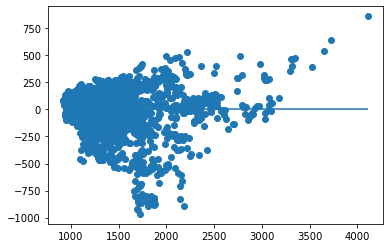

In [690]:
#Create Predictions from X_test set
predictions = model.predict(X_test_scaled)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [691]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

mean squared error (MSE): 36245.917524917626
R-squared (R2 ): 0.8116933823777418


In [692]:
X2 = sma.add_constant(X_train_scaled)
est = sma.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 1.298e+04
Date:                Sun, 14 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:20:04   Log-Likelihood:                -36476.
No. Observations:                5525   AIC:                         7.296e+04
Df Residuals:                    5522   BIC:                         7.298e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1391.1613      2.399    580.009      0.0

In [636]:
cluster = ml_data_all[['Avg_Sale_Price', 'HVI', 'Avg_Rent', 'Size_1M-2.9M', 'Size_3M+', 'Size_Below_1M']]
cluster.head()

Avg_Sale_Price       HVI  Avg_Rent  Size_1M-2.9M  Size_3M+  Size_Below_1M
0        365000.0  398201.0    2335.0             0         1              0
1        481333.0  516105.0    1846.0             0         1              0
2        183667.0  198819.0    1477.0             0         1              0
3        174967.0  166352.0    1130.0             0         1              0
4        210833.0  214635.0    1316.0             0         1              0

In [637]:
from sklearn.cluster import KMeans

In [638]:
X_scaled = StandardScaler().fit_transform(cluster)
X_scaled

array([[ 0.71327592,  0.77219124,  2.18446938, -0.81649658,  2.        ,
        -0.81649658],
       [ 1.61147894,  1.52756752,  1.04803003, -0.81649658,  2.        ,
        -0.81649658],
       [-0.68678982, -0.50519062,  0.1904715 , -0.81649658,  2.        ,
        -0.81649658],
       ...,
       [ 2.05128827,  2.01410559,  0.84584143, -0.81649658, -0.5       ,
         1.22474487],
       [ 1.24152118,  0.95619825,  0.63668082, -0.81649658, -0.5       ,
         1.22474487],
       [ 2.23173494,  1.94871875,  1.06894609, -0.81649658, -0.5       ,
         1.22474487]])

In [639]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
# Define DataFrame and plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [640]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X_scaled)

# Predict clusters
predictions = model.predict(X_scaled)
predictions

array([2, 3, 2, ..., 3, 1, 3])

In [641]:
cluster['Class'] = model.labels_
cluster.head()

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Avg_Sale_Price       HVI  Avg_Rent  Size_1M-2.9M  Size_3M+  Size_Below_1M  \
0        365000.0  398201.0    2335.0             0         1              0   
1        481333.0  516105.0    1846.0             0         1              0   
2        183667.0  198819.0    1477.0             0         1              0   
3        174967.0  166352.0    1130.0             0         1              0   
4        210833.0  214635.0    1316.0             0         1              0   

   Class  
0      2  
1      3  
2      2  
3      2  
4      2

In [642]:
cluster.hvplot.scatter(x='HVI', y='Avg_Rent', by='Class')

:NdOverlay   [Class]
   :Scatter   [HVI]   (Avg_Rent)

In [643]:
import plotly.express as px
fig = px.parallel_coordinates(cluster, color='Class', title='Class data, all fields')
fig.show()

In [644]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2 = df.copy()
df2['Size'] = le.fit_transform(df2['Size'])
df2.head()

Date                            City State  Size  Avg_Sale_Price  \
0  2014-02-28                        New York    NY     1        365000.0   
1  2014-02-28  Los Angeles-Long Beach-Anaheim    CA     1        481333.0   
2  2014-02-28                         Chicago    IL     1        183667.0   
3  2014-02-28               Dallas-Fort Worth    TX     1        174967.0   
4  2014-02-28                    Philadelphia    PA     1        210833.0   

   %Change_SP       HVI  %Change_HVI  Avg_Rent  %Change_Rent  
0        0.46  398201.0         0.43    2335.0          1.26  
1        0.49  516105.0         0.48    1846.0          1.71  
2       -2.48  198819.0         0.77    1477.0          0.89  
3        0.38  166352.0         0.65    1130.0          2.26  
4       -2.69  214635.0         0.27    1316.0         -2.52

In [645]:
df2[['Avg_Sale_Price', 'HVI', 'Avg_Rent']] = MinMaxScaler().fit_transform(df2[['Avg_Sale_Price', 'HVI', 'Avg_Rent']])

In [646]:
fig = px.parallel_coordinates(df2, color='Size',
                 dimensions=['Avg_Sale_Price', 'HVI', 'Avg_Rent'])
fig.show()

In [647]:
cluster = df2[['Size','Avg_Sale_Price', 'HVI', 'Avg_Rent']] 
X_scaled = MinMaxScaler().fit_transform(cluster)

In [648]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
# Define DataFrame and plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [649]:
# Initialize the K-Means model.
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(X_scaled)

# Predict clusters
predictions = model.predict(X_scaled)
predictions

array([2, 2, 2, ..., 0, 0, 0])

In [650]:
cluster['Class'] = model.labels_
cluster.head()

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Size  Avg_Sale_Price       HVI  Avg_Rent  Class
0     1        0.241179  0.212196  0.631664      2
1     1        0.351916  0.296953  0.434168      2
2     1        0.068569  0.068867  0.285137      2
3     1        0.060287  0.045528  0.144992      2
4     1        0.094428  0.080237  0.220113      2

In [651]:
fig = px.parallel_coordinates(cluster, color='Class',
                 dimensions=['Size','Avg_Sale_Price', 'HVI', 'Avg_Rent'])
fig.show()

In [652]:
df2.head()

Date                            City State  Size  Avg_Sale_Price  \
0  2014-02-28                        New York    NY     1        0.241179   
1  2014-02-28  Los Angeles-Long Beach-Anaheim    CA     1        0.351916   
2  2014-02-28                         Chicago    IL     1        0.068569   
3  2014-02-28               Dallas-Fort Worth    TX     1        0.060287   
4  2014-02-28                    Philadelphia    PA     1        0.094428   

   %Change_SP       HVI  %Change_HVI  Avg_Rent  %Change_Rent  
0        0.46  0.212196         0.43  0.631664          1.26  
1        0.49  0.296953         0.48  0.434168          1.71  
2       -2.48  0.068867         0.77  0.285137          0.89  
3        0.38  0.045528         0.65  0.144992          2.26  
4       -2.69  0.080237         0.27  0.220113         -2.52

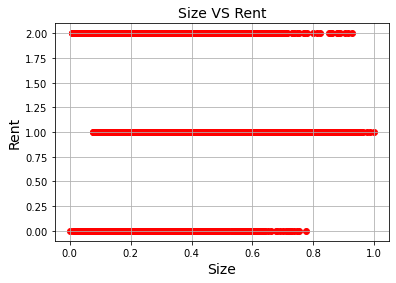

In [673]:
plt.scatter(df2['Avg_Rent'], df2['Size'], color='red')
plt.title('Size VS Rent', fontsize=14)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Rent', fontsize=14)
plt.grid(True)
plt.show()

In [653]:
X = df2[['Size','Avg_Sale_Price', 'HVI']]
y= df2['Avg_Rent'].values.reshape(-1, 1)

In [654]:
# Creating a MinMaxScaler instance to scale data and try and fix multicollinearity
scaler = MinMaxScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [655]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
score = model.score(X_train_scaled, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.8469221665656448


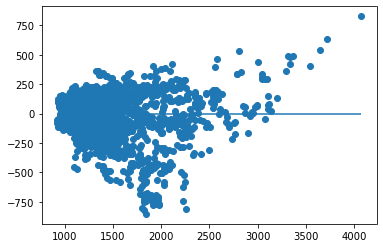

In [656]:
#Create Predictions from X_test set
predictions = model.predict(X_test_scaled)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [657]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

mean squared error (MSE): 30409.953482403616
R-squared (R2 ): 0.8420126769205121


In [658]:
X2 = sma.add_constant(X_train_scaled)
est = sma.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     7635.
Date:                Sun, 14 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:04:08   Log-Likelihood:                -36101.
No. Observations:                5525   AIC:                         7.221e+04
Df Residuals:                    5520   BIC:                         7.224e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        728.3575      3.213    226.698      0.0

In [666]:
X = df2[['Avg_Sale_Price', 'HVI']]
y= df2['Avg_Rent'].values.reshape(-1, 1)

In [667]:
# Creating a StandardScaler instance to scale data and try and fix multicollinearity
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [668]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
score = model.score(X_train_scaled, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.8469221665656448


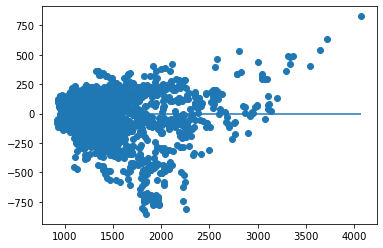

In [669]:
#Create Predictions from X_test set
predictions = model.predict(X_test_scaled)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [670]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

mean squared error (MSE): 30409.953482403616
R-squared (R2 ): 0.8420126769205121


In [671]:
X2 = sma.add_constant(X_train_scaled)
est = sma.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     7635.
Date:                Sun, 14 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:08:05   Log-Likelihood:                -36101.
No. Observations:                5525   AIC:                         7.221e+04
Df Residuals:                    5520   BIC:                         7.224e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1391.1613      2.241    620.670      0.0